## Introduction

The notebook tries to answer the question: Who are more likely to survive in the titanic disaster.
- The titanic dataset which is used in the analysis can be downloaded with this link:
https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv

The central question of the analysis is: What variables show correlation to survival. Based on the central question, a few starting points will be examined in detail in the following session **Defining Questions for Analysis**.

The notebook below will go through the data analysis process, which includes the following steps:
- Loading data
- Defining questions for analysis
- Data wrangling
- Exploring data
- Drawing conclusion

## Loading Data

In [100]:
import warnings
warnings.filterwarnings('ignore')

# Read in the data from titanic-data.csv 
# and store the results in the below variable.

import pandas as pd
import numpy as np

titanic = pd.read_csv('titanic-data.csv')

In [101]:
# Print the first few rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
# Take a look at general statistic
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Parr, Mr. William Henry Marsh",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [103]:
# Calculate mean of numerical variables group by the
# variable Survived to have a feeling what variables 
# could have a correlation with survival

mean = titanic.groupby(['Survived']).mean()
mean.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


It should be noted that comparing the mean is a simple method, which can't answer if there is a correlation between a specific variable and survival or not. However, comparing the mean here does provide some starting points for the analysis below. 

With comparing the mean between the groups survival and death and using our common sense / experience, we could briefly define a few very interesting variables:
- Pclass, Sex, Age, SibSp, Parch.

In order to analyse the varibles above further, the missing value for the variable **Age** should be cleaned.

Further, from the summary above we can see that it is not necessary to clean outlier for this dataset.

## Defining Questions for Analysis Phase

The central question of the analysis is: **What variables show correlation to survival**. Based on the central question, the following starting points will be examined in detail:

- How many passengers are there in total and how many of them have survived from the titanic disaster?
- Are passengers with better ticket class more likely to survive?
- Do male have more advantage to survice than female?
- Is it more likely to survive if a passengers travel with family together?
- Is there patterns between age and survival?

## Data Wrangling Phase

### Missing Age values
In the ```describe()``` above we have seen that there are 177 passangers with missing age. Since the age is not imprtnt for all analyis I will split the data in to sets: one in which the passengers with missing age are removed and one with all passangers. The analysis looking at the influence of the age on the survival will look at the filter data set. That way we do not loose data when looking at the other criteria.

In [104]:
# Select variables for analysis
titanic = titanic[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [105]:
# In the variables selected, only 714 passengers out of 891 have age data.
# Therefore use dropna to remove the missing rows. 714 rows should
# be expected after dropna.
titanicWithFilteredAge = titanic.dropna()

In [106]:
# Create new variable: Age_class

from math import floor
def get_class_10(value):
    value = value / 10
    value = floor(value) * 10
    return value

titanicWithFilteredAge['Age_class_interval_10'] = titanicWithFilteredAge['Age'].apply(get_class_10)

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ----------------------------------------------------------- #
#                                                             #
#           Helper Functions and constants                    #
#                                                             #
# ----------------------------------------------------------- #

FEATURE_LABELS = {
    'Pclass': 'Ticket Class',
    'SibSp': '# of siblings / spouses',
    'Parch': '# of parents / children',
    'Sex': 'Sex',
    'Survived': 'Survived',
    'PassengerId': 'PassengerId',
    'Age_class_interval_10': 'Age Group',
    'is_with_family_on_board': 'With Family On Board'
}

FEATURE_TICK_LABELS = {
    'Pclass': ['1st', '2nd', '3rd'],
    'Survived': ['No', 'Yes'],
    'is_with_family_on_board': ['No', 'Yes'],
}

AGE_DEPENDENT_FEATURES = ['Age', 'Age_class_interval_10']

# displays the count of the x_feature
def Countplot(x_feature, title):
    data = titanic
    if x_feature in AGE_DEPENDENT_FEATURES:
        data = titanicWithFilteredAge

    sns.countplot(x=x_feature, data=data)
    configure_x_axis(x_feature)
    plt.title(title)

# displays 'survived' depending on the given x_feature
def BarPlot_1d(x_feature, title):
    data = titanic
    if x_feature in AGE_DEPENDENT_FEATURES:
        data = titanicWithFilteredAge
        
    sns.barplot(x=x_feature, y='Survived', data = data)
    configure_x_axis(x_feature)
    plt.ylabel('Percent of Survival')
    plt.title(title)

# displays 'survived' depending on the given x_feature and hue
def BarPlot_2d(x_feature, hue, title):
    data = titanic
    plt.figure(figsize=(10,6))
    if x_feature in AGE_DEPENDENT_FEATURES or hue in AGE_DEPENDENT_FEATURES:
        data = titanicWithFilteredAge
    
    sns.barplot(x=x_feature, y='Survived', hue=hue, data = data)
    configure_x_axis(x_feature)

    plt.ylabel('Percent of Survival')
    plt.title(title)

# displays a swarm plot  
def Swarm_Plot(x_feature, y_feature, hue, title):
    data = titanic
    if x_feature in AGE_DEPENDENT_FEATURES or hue in AGE_DEPENDENT_FEATURES:
        data = titanicWithFilteredAge

    sns.swarmplot(x=titanic[x_feature], y=titanic[y_feature], hue=titanic[hue], data=data)
    plt.title(title)
    configure_x_axis(x_feature)

# add axis label and category labels for the given x_feature        
def configure_x_axis(x_feature):
    plt.xlabel(FEATURE_LABELS[x_feature])
    if x_feature in FEATURE_TICK_LABELS:
        plt.xticks(np.arange(len(FEATURE_TICK_LABELS[x_feature])), FEATURE_TICK_LABELS[x_feature])
        
# function to get the mean of group
def get_ratio_survival_by_group(x_feature):
    if x_feature in AGE_DEPENDENT_FEATURES:
        print(titanicWithFilteredAge.groupby(x_feature).mean()['Survived'])
    else:
        print(titanic.groupby(x_feature).mean()['Survived'])

## Exploring Data Phase

- #### How many passengers are there in total and how many of them have survived from the titanic disaster?

Number of total passengers : 891


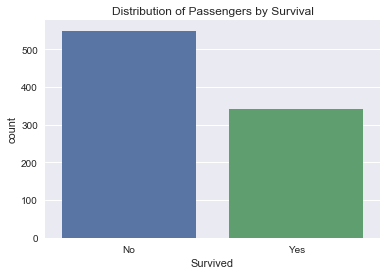

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

num_total = len(titanic['PassengerId'])
print ('Number of total passengers : %d' %num_total)

Countplot('Survived', 'Distribution of Passengers by Survival')

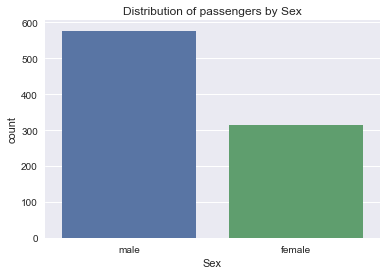

In [109]:
Countplot('Sex', 'Distribution of passengers by Sex')

The plot above shows that there are almost twice as many male passengers than female passengers.

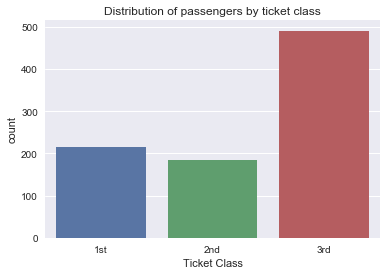

In [110]:
Countplot('Pclass', 'Distribution of passengers by ticket class')

The plot above shows that the ticket class is not evenly distributed. There are more Passengers with a 3rd class ticket than the other classes combined.

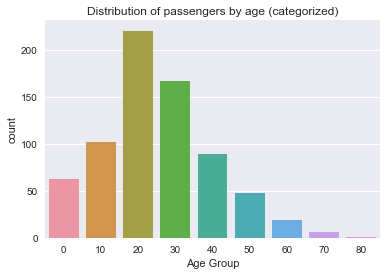

In [111]:
Countplot('Age_class_interval_10','Distribution of passengers by age (categorized)')

The interval of age is 10 years. For example: Age group 10 includes from 10 to 19 years old. The visualization shows that there are not many passengers above 60. It would be a good idea to combine all passengers in an age group.

In [112]:
# Redo computation of Age_class and combine all passengers above 60
from math import floor
def get_class_10_special(value):
    if value > 60:
        return 60
    value = value / 10
    value = floor(value) * 10
    return value

titanicWithFilteredAge['Age_class_interval_10'] = titanicWithFilteredAge['Age'].apply(get_class_10_special)

# change labels for the age group to reflect the change in the categorization
FEATURE_TICK_LABELS['Age_class_interval_10'] = ['< 10', '10-19', '20-29', '30-39', '40-49', '50-59', '>= 60']

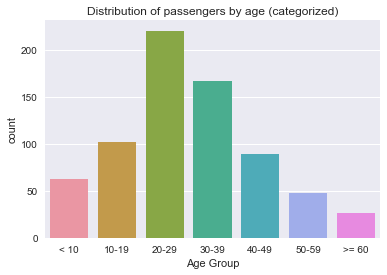

In [113]:
Countplot('Age_class_interval_10','Distribution of passengers by age (categorized)')

- #### Are passengers with better ticket class more likely to survive?

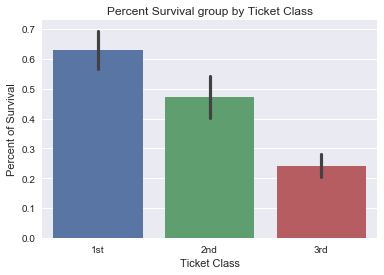

In [114]:
BarPlot_1d('Pclass', 'Percent Survival group by Ticket Class')

The visualization **Percent Survival group by Ticket Class** shows a correlation between the ticket class and survival: Passengers with a better class seems to be more likely to survive.

This could probably be due to that a better class might garantee a shorter way from the cabin to the board. Another possible explanation could be that lower class cabins are more likely to be flooded by water, as they are located at the bottom of the ship. 

In [115]:
get_ratio_survival_by_group('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


The statistic above shows the ratio survival group by Pclass.

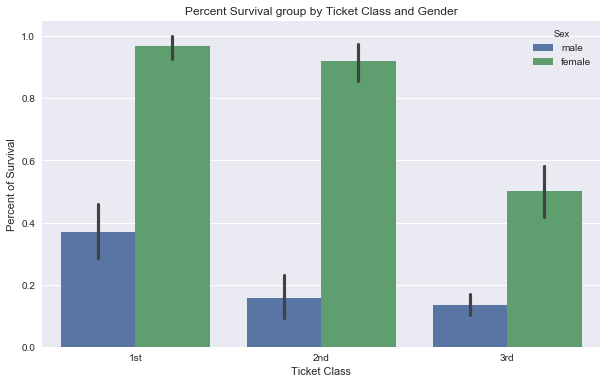

In [116]:
BarPlot_2d('Pclass', 'Sex', 'Percent Survival group by Ticket Class and Gender')

Combining the ticket class and gender together, the barchart **Percent Survival group by Ticket Class and Gender** shows that female is more likely to survive than male for each class.

- #### Do male have more advantage to survice than female?

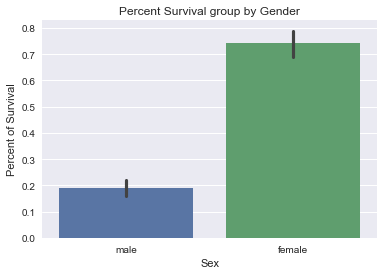

In [117]:
BarPlot_1d('Sex', 'Percent Survival group by Gender')

The bartchart **Percent Survival group by Gender** shows a relatively strong correlation between gender and survival. 

One possible explanation could be that female would be first offered with rescue places by the rescue team. 

In [118]:
get_ratio_survival_by_group('Sex')

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


The statistic above shows the ratio survival group by gender.

- #### Is it more likely to survive if a passenger travel with family together?

It would be also interesting to investigate the relationship between survival and number of family members on board. A new variable will be created called **num_family_member_on_board**.

In [119]:
# Create variable num_family_member_on_board
titanic['num_family_member_on_board'] = titanic['SibSp'] + titanic['Parch'] 

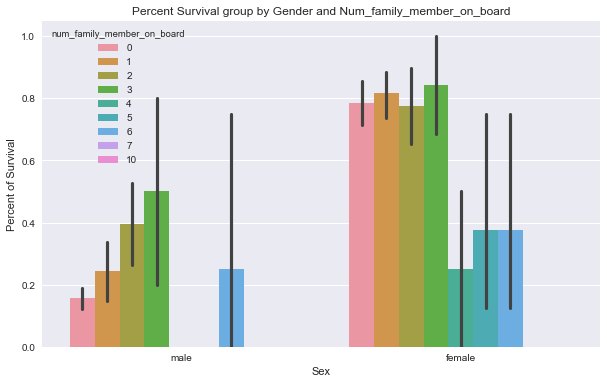

In [120]:
BarPlot_2d('Sex', 'num_family_member_on_board', 'Percent Survival group by Gender and Num_family_member_on_board')

According to our experience in life, a normal family size would be 3-4 persons. Therefore we will only look at a subset of the dataset, where num_family_member_on_board is less than 4. 

From the histogram where the num_family_member_on_board is less than 4, we see that male with more family members on board is more likely to survive. What about the comparison between with_family_on_board and without_family_on_board?

In [121]:
# Create new feature is_with_family_on_board
def with_family(num_family_member):
    if num_family_member > 0:
        return 'Yes'
    else:
        return 'No'
    
for passenger in titanic:
    titanic['is_with_family_on_board'] = titanic['num_family_member_on_board'].apply(with_family)

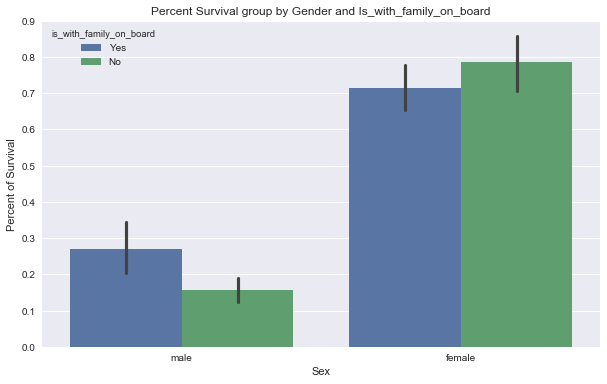

In [122]:
BarPlot_2d('Sex', 'is_with_family_on_board', 'Percent Survival group by Gender and Is_with_family_on_board')

In this plot we can see that the percent to survival of male is higher, when he has family on board.

- #### Is there patterns between age and survival?

In order to have a feeling of age and survival, we first use the variable age_class instead of age to visualize the general trend. The interval of age class is 10 years. For example: Age class **10.0** includes from 10 to 19 years old.

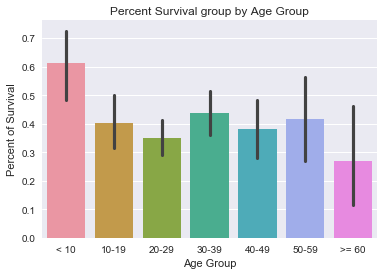

In [123]:
BarPlot_1d('Age_class_interval_10', 'Percent Survival group by Age Group');

The visualization **Percent Survival on Age Glass** shows that children under 10 years old as well as passengers between 30 and 40 years old are more likely to survive. 

In [124]:
get_ratio_survival_by_group('Age_class_interval_10')

Age_class_interval_10
0     0.612903
10    0.401961
20    0.350000
30    0.437126
40    0.382022
50    0.416667
60    0.269231
Name: Survived, dtype: float64


The statistic above shows the ratio survival group by age_class_interval_10.

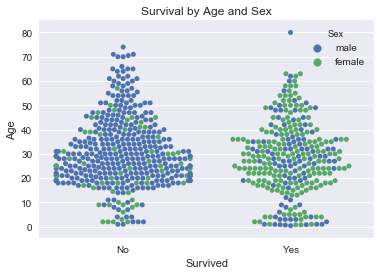

In [125]:
Swarm_Plot('Survived', 'Age', 'Sex', 'Survival by Age and Sex')

The visualization **Survival by Age and Sex** gives more details about the best age to survive: This includes 0-5 years old and 15-35 years old.

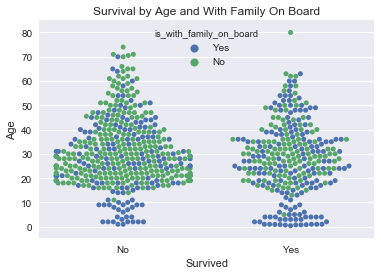

In [126]:
Swarm_Plot('Survived','Age','is_with_family_on_board','Survival by Age and With Family On Board')

The visualizaton **Survival by Age and Is_with_family_on_board** shows that passengers under 10 years old are mostly traveling with family together. A lot from this group have survived. 

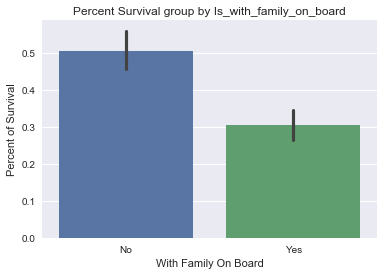

In [127]:
BarPlot_1d('is_with_family_on_board', 'Percent Survival group by Is_with_family_on_board');

In [128]:
get_ratio_survival_by_group('is_with_family_on_board')

is_with_family_on_board
No     0.303538
Yes    0.505650
Name: Survived, dtype: float64


The statistic above shows the ratio survival group by is_with_family_on_board.

## Drawing Conclusions

With the analysis above we can see there is correlation between the following variables and survival:
- **Pclass**: Passengers with better ticket class are more likely to survive.
- **Sex**: The percentage of survival of female passengers is a lot higher than the male passengers.
- **Age**: The age group 0-10 and 30-40 shows the highest percentage of survival.
- **With family on board**: Passengers with family members on board are more likely to survive. This significantly increases the chance of survival for male passengers which is overall quite low.

The above conclusion is based on visualization as well as calculating the ratio of survival between groups for the variables observed. It implies correlation and shows patterns. Statistical test is not included in the analysis and therefore causation is not proved here.

### Limitations of the dataset

#### Missing Age
For 177 passengers the age is missing. In order to not impact the other features those entries are not completely removed from the dataset. Instead a filtered dataset is only used when analyzing the impact of age on the survival.

#### Age
The age is not evenly distributed. There are some extrem values like one passenger with the age of 80 who survived. Maybe this person was really rich and had influence or was in any other way important. We can not tell from the dataset. To avoid misleading visualization I chose to combine all 'old' people in the age above 60 in one age class. It might even be worth an additional analysis with just 3 groups: children (0-18), adults(18-60) and senior citizens(60 and above). This would make more sense in the common understanding, that children are prefered in case of emergency, as well as one person to take care of them, most of the time its mother.

#### Uneven distribution of Sex
There have been almost twice as many male passengers on board of the titanic than female ones. This can influence the result in multiple ways. When assuming that female passengers are preferred when it comes to rescue then an even distribution of passengers would cause even less survival chances of males since the places on the resuce boats are limited. On the other hand in an emergency sorting passengers by their gender will further inhibit the rescue progress. It is easier to let a relatively small amount of people go first than to split the amount of passengers in half. Space is limited and there will be panic. Maybe thats why the rule 'ladies first' might not be followed so strictly if the portion of female passengers is higher, leading to lower survival rates for female passengers.

## Sources

Following sources are used to complete the data investigation project here:
- Udacity course: Intro to Data Analysis
- Titanic dataset provided by Kaggel: https://www.kaggle.com/c/titanic/data
- Matplotlib documentation: http://matplotlib.org/api/pyplot_summary.html
- Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html
- Seaborn documentation: http://seaborn.pydata.org/tutorial/categorical.html